In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install -e .

In [32]:
import os
import glob

def list_files_with_prefix(directory, prefix):
    pattern = os.path.join(directory, f"{prefix}*")
    files = glob.glob(pattern)
    
    return files

def list_txts(directory): 
    txt_files = glob.glob('*.txt')
    return txt_files

def extend_run_dict_txt(directory):
    subfolders = [f.path for f in os.scandir(directory) if f.is_dir()]
    for subfolder in subfolders:
        if not subfolder.split('/')[-1].startswith('.'):
            run_dict_txt[subfolder[:-3]].extend(list_txts(subfolder))

In [34]:
directory = "outputs/biodiscover/"
prefix = "f08_ept-14"

    
run_dict_txt={}
for run in list_files_with_prefix(directory, prefix):
    run_dict_txt[run] = []
# List the files
setting_folders = list_files_with_prefix(directory, prefix)

for sf in setting_folders:
    extend_run_dict_txt(sf)

In [35]:
import glob

def list_report_txt_files(directory):
    pattern = '**/*report.txt'
    return glob.glob(os.path.join(directory, pattern), recursive=True)

directory = 'outputs'
report_files = list_report_txt_files(directory)

In [36]:
my_report_files = []
for file in report_files:
    if 'f08' in file:
        my_report_files.append(file)

In [37]:
report_files = my_report_files

In [38]:
def read_scores(file): 
    with open(file, 'r') as input_file:
        linecount = 0
        cash = []
        for line in input_file:
            if linecount == 17:
                acc_f1 = float(line.split()[1])
            elif linecount == 18:
                macro_avg_precision = float(line.split()[2])
                macro_avg_recall = float(line.split()[3])
                macro_avg_f1 = float(line.split()[4])
            elif linecount == 19:
                weighted_avg_precision = float(line.split()[2])
                weighted_avg_recall = float(line.split()[3])
                weighted_avg_f1 = float(line.split()[4])
            linecount +=1
    scores = [acc_f1, macro_avg_precision, macro_avg_recall, macro_avg_f1, weighted_avg_precision, weighted_avg_recall, weighted_avg_f1]
    return scores

In [39]:
scores_listoflists = []
for file in report_files:
    lr = file.split('/')[-1].split('_')[-7][2:]
    images = file.split('/')[-1].split('_')[-8]
    if images == 'imgbel':
        images = 'All'
    if images == 'img100':
        images = 100
    if images == 'img150':
        images = 150
    if images == 'img200':
        images = 200
    if images == 'img300':
        images = 300
    if images == 'img400':
        images = 400
    if images == 'img500':
        images = 500
    scores_listoflists.append([lr, images] + read_scores(file))

In [41]:
import pandas as pd
col_names=['Learning Rate', 'Number of Images', 'acc_f1', 'macro_avg_precision', 'macro_avg_recall', 'macro_avg_f1', 'weighted_avg_precision', 'weighted_avg_recall', 'weighted_avg_f1']
scores_df = pd.DataFrame(scores_listoflists)
scores_df.columns = col_names
scores_df['Number of Images'] = scores_df['Number of Images'].apply(str)
scores_df['Learning Rate'] = scores_df['Learning Rate'].apply(str)
scores_df.to_csv('EPT-14-CNN-scores.csv')
scores_df

,Learning Rate,Number of Images,acc_f1,macro_avg_precision,macro_avg_recall,macro_avg_f1,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1
0,0.001,400,0.88,0.77,0.73,0.74,0.87,0.88,0.87
1,0.005,All,0.88,0.85,0.71,0.74,0.88,0.88,0.87
2,0.001,10,0.87,0.75,0.70,0.72,0.86,0.87,0.86
3,1e-05,200,0.87,0.79,0.71,0.73,0.86,0.87,0.86
4,1e-05,25,0.86,0.76,0.67,0.69,0.85,0.86,0.85
5,1e-05,50,0.87,0.77,0.70,0.72,0.86,0.87,0.86
6,0.0005,All,0.89,0.78,0.72,0.74,0.88,0.89,0.88
7,1e-05,100,0.87,0.76,0.68,0.70,0.85,0.87,0.85
8,0.001,75,0.88,0.78,0.72,0.74,0.87,0.88,0.87
9,0.001,100,0.89,0.81,0.76,0.78,0.89,0.89,0.89


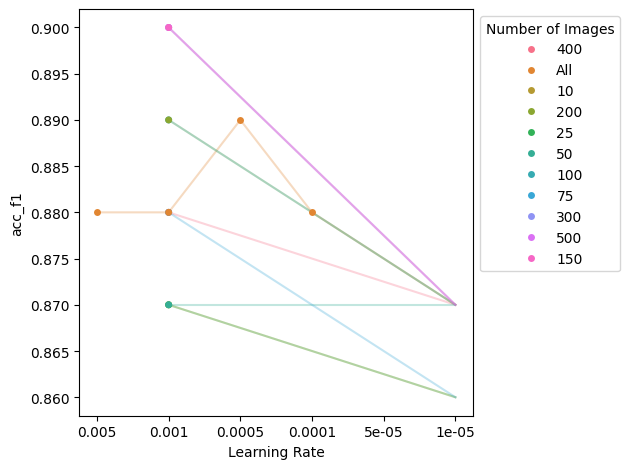

In [44]:
# Plotting F1 scores for different learning rates on x axis

import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.stripplot(data=scores_df, 
                   x="Learning Rate",  
                   order = ['0.005','0.001', '0.0005', '0.0001', '5e-05'], 
                   y="acc_f1", 
                   hue="Number of Images",
                   jitter=False)
ax = sns.lineplot(data = scores_df, 
                  x = "Learning Rate",
                  y = "acc_f1", 
                  hue = "Number of Images",
                  alpha = 0.3, 
                  linestyle = 'solid', 
                  legend = False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Run8_Learning_rates_F1.png')
plt.show()

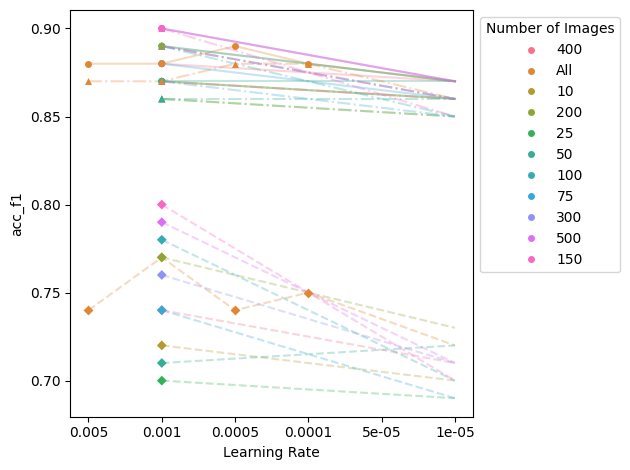

In [45]:
# Plotting further scores for different learning rates on x axis

import seaborn as sns
import matplotlib.pyplot as plt

lr_order = ['0.005','0.001', '0.0005', '0.0001', '5e-05']

plt.clf()
# Adding F1 scores to plot
ax = sns.stripplot(data = scores_df,
                   x = "Learning Rate",  
                   order = lr_order, 
                   y = "acc_f1", 
                   hue = "Number of Images", 
                   jitter = False)
ax = sns.lineplot(data = scores_df, 
                  x = "Learning Rate",
                  y = "acc_f1", 
                  hue = "Number of Images",
                  alpha = 0.3, 
                  linestyle = 'solid', 
                  legend = False)

# Adding Macro Average F1 scores to plot
ax = sns.stripplot(data=scores_df,
                   x="Learning Rate",  
                   order = lr_order, 
                   y="macro_avg_f1", 
                   hue="Number of Images",
                   jitter=False,
                   marker="D",
                   legend=False)
ax = sns.lineplot(data=scores_df,
                  x="Learning Rate",
                  y="macro_avg_f1",
                  hue="Number of Images",
                  alpha=0.3,
                  linestyle='--',
                  legend=False)

# Adding Weighted Average F1 scores to plot
ax = sns.stripplot(data=scores_df,
                   x="Learning Rate",  
                   order = lr_order, 
                   y="weighted_avg_f1", 
                   hue="Number of Images",
                   jitter=False,
                   marker="^",
                   legend=False)
ax = sns.lineplot(data=scores_df, 
                  x="Learning Rate", 
                  y="weighted_avg_f1", 
                  hue="Number of Images",
                  alpha=0.3, 
                  linestyle='-.', 
                  legend=False)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Learning_rates_scores.png')
plt.show()

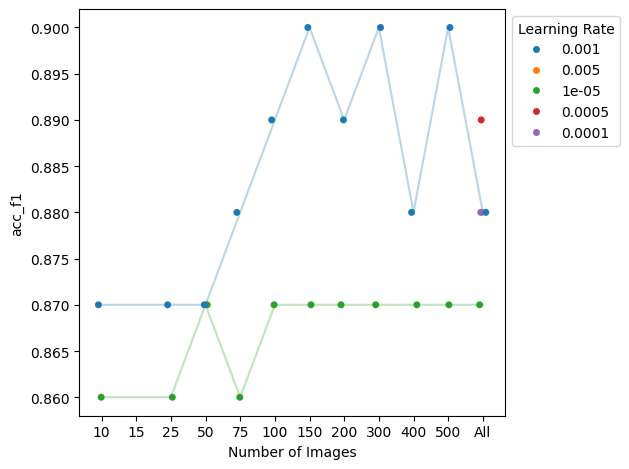

In [46]:
# Plotting F1 scores for different number of images on x axis

import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.stripplot(data=scores_df, 
                   x="Number of Images",  
                   order = ['10', '15', '25', '50', '75', '100', '150', '200', '300', '400', '500', 'All'], 
                   y="acc_f1", 
                   hue="Learning Rate",
                   jitter=True)
ax = sns.lineplot(data = scores_df, 
                  x = "Number of Images",
                  y = "acc_f1", 
                  hue = "Learning Rate",
                  alpha = 0.3, 
                  linestyle = 'solid', 
                  legend = False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Image_number_F1.png')
plt.show()

In [ ]:
# Plotting further scores for different number of images on x axis

import seaborn as sns
import matplotlib.pyplot as plt

img_order = ['15', '25', '50', '100', '200', '500', 'All']

plt.clf()
# Adding F1 scores to plot
ax = sns.stripplot(data = scores_df,
                   x = "Number of Images",  
                   order = img_order, 
                   y = "acc_f1", 
                   hue = "Learning Rate", 
                   jitter = False)
ax = sns.lineplot(data = scores_df, 
                  x = "Number of Images",
                  y = "acc_f1", 
                  hue = "Learning Rate",
                  alpha = 0.3, 
                  linestyle = 'solid', 
                  legend = False)

# Adding Macro Average F1 scores to plot
ax = sns.stripplot(data=scores_df,
                   x="Number of Images",  
                   order = img_order, 
                   y="macro_avg_f1", 
                   hue="Learning Rate",
                   jitter=False,
                   marker="D",
                   legend=False)
ax = sns.lineplot(data=scores_df,
                  x="Number of Images",
                  y="macro_avg_f1",
                  hue="Learning Rate",
                  alpha=0.3,
                  linestyle='--',
                  legend=False)

# Adding Weighted Average F1 scores to plot
ax = sns.stripplot(data=scores_df,
                   x="Number of Images",  
                   order = img_order, 
                   y="weighted_avg_f1", 
                   hue="Learning Rate",
                   jitter=False,
                   marker="^",
                   legend=False)
ax = sns.lineplot(data=scores_df, 
                  x="Number of Images", 
                  y="weighted_avg_f1", 
                  hue="Learning Rate",
                  alpha=0.3, 
                  linestyle='-.', 
                  legend=False)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Image_number_scores.png')
plt.show()

In [ ]:
import glob

def list_grouped_predictions_files(directory):
    pattern = '**/*_grouped_predictions.csv'
    return glob.glob(os.path.join(directory, pattern), recursive=True)

directory = 'outputs'
prediction_files = list_grouped_predictions_files(directory)

In [ ]:
appended_mismatch_data = []
for file in prediction_files:
    df = pd.read_csv(file)
    mismatch_df = df[df['Final_species_label'] != df['y_pred']]
    appended_mismatch_data.append(mismatch_df)
    
appended_mismatch_data = pd.concat(appended_mismatch_data)

In [ ]:
row_counts = appended_mismatch_data.value_counts().reset_index(name='count')

print(row_counts)

In [ ]:
appended_match_data = []
for file in prediction_files:
    df = pd.read_csv(file)
    match_df = df[df['Final_species_label'] == df['y_pred']]
    appended_match_data.append(match_df)
    
appended_match_data = pd.concat(appended_match_data)

In [ ]:
row_counts = appended_match_data.value_counts().reset_index(name='count')

print(row_counts)

In [ ]:
import numpy as np

In [ ]:
mistakes_df = pd.DataFrame(np.transpose(np.unique(mismatch_individuals, return_counts=True)))
mistakes_df.columns = ['Individual', 'Count']

In [ ]:
row_counts.to_excel('Wrong Identifications with names.xlsx')